In [26]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calculate_error(D, w):
    N = len(D)
    error = 0
    for x_n, y_n in D:
        p_hat_n = sigmoid(np.dot(w, x_n))
        error += (-y_n * np.log(p_hat_n) - (1 - y_n) * np.log(1 - p_hat_n))
    return error / N

def clog_mge(D, w_init, eta, CP, CLog):
    N = len(D)
    w = w_init
    t = 0
    E=[]
    while CP(t):
        for n in range(N):
            E.append(calculate_error(D, w))
            x_n, y_n = D[n]
            p_hat_n = sigmoid(np.dot(w, x_n))  # Calcula a probabilidade prevista
            gradient = (p_hat_n - y_n) * x_n  # Calcula o vetor gradiente
            print(f"w{t} = ",w)
            print(f"X_n{n} = ",x_n)
            print(f"E({t}) = ", E[-1])
            w = w - eta * gradient  # Atualiza os parâmetros w
            if not CP(t):
                break
            else:
                t += 1
    return w, E

# Definindo a base de dados AND
D = [(np.array([1, 1, 1]), 0), 
     (np.array([1, 0, 0]), 0), 
     (np.array([1, 0, 1]), 1), 
     (np.array([1, 1, 0]), 1)]

# Parâmetros
w_init = np.array([0, 0, 0])  # Aproximação inicial dos parâmetros
eta = 0.5  # Taxa de aprendizagem
CLog = 0.5  # Valor de corte para o critério de parada

# Critério de parada: número máximo de iterações
def CP(t):
    return t < 200

# Executando o algoritmo CLog_MGE
resultado, E = clog_mge(D, w_init, eta, CP, CLog)


w0 =  [0 0 0]
X_n0 =  [1 1 1]
E(0) =  0.6931471805599453
w1 =  [-0.25 -0.25 -0.25]
X_n1 =  [1 0 0]
E(1) =  0.7277410985884893
w2 =  [-0.46891175 -0.25       -0.25      ]
X_n2 =  [1 0 1]
E(2) =  0.7598426014170951
w3 =  [-0.13272808 -0.25        0.08618367]
X_n3 =  [1 1 0]
E(3) =  0.7010529199898312
w4 =  [0.16453737 0.04726546 0.08618367]
X_n0 =  [1 1 1]
E(4) =  0.7001154722769924
w5 =  [-0.12243774 -0.23970966 -0.20079145]
X_n1 =  [1 0 0]
E(5) =  0.7107174743297289
w6 =  [-0.35715211 -0.23970966 -0.20079145]
X_n2 =  [1 0 1]
E(6) =  0.7370651409680354
w7 =  [-0.03916382 -0.23970966  0.11719685]
X_n3 =  [1 1 0]
E(7) =  0.6966238034404875
w8 =  [0.24547119 0.04492535 0.11719685]
X_n0 =  [1 1 1]
E(8) =  0.7068955998300392
w9 =  [-0.05478415 -0.25532999 -0.18305849]
X_n1 =  [1 0 0]
E(9) =  0.7055227662797687
w10 =  [-0.29793784 -0.25532999 -0.18305849]
X_n2 =  [1 0 1]
E(10) =  0.7290919972964233
w11 =  [ 0.01105372 -0.25532999  0.12593307]
X_n3 =  [1 1 0]
E(11) =  0.6960344612226929
w12 = 

Parâmetros otimizados: [ 0.56617112 -0.28130453  0.00410492]
E(0) =  0.6931471805599453
E(1) =  0.7277410985884893
E(2) =  0.7598426014170951


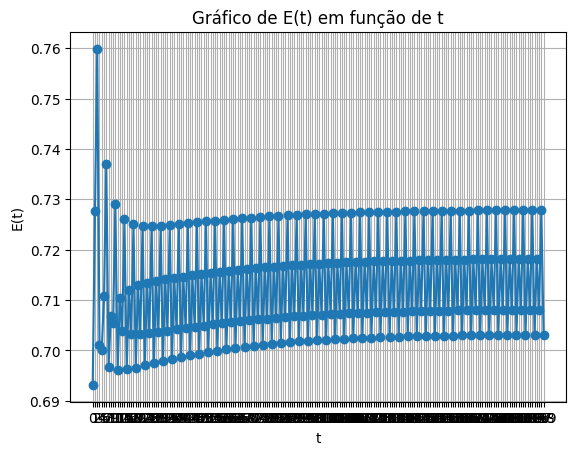

In [27]:
print("Parâmetros otimizados:", resultado)
print("E(0) = ", E[0])
print("E(1) = ", E[1])
print("E(2) = ", E[2])

t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, marker='o', linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

##Tarefa

Exercicio 1 a)

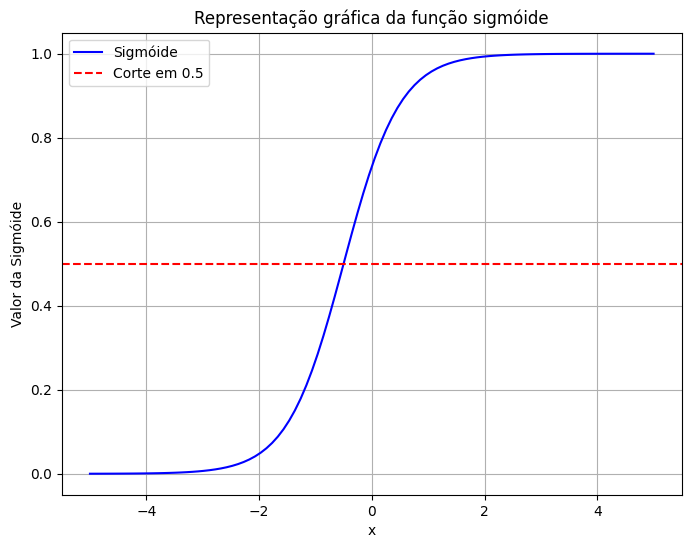

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Parâmetros do classificador
w = np.array([1, 2])  # Vetor de pesos
CLog = 0.5  # Valor de corte

# Calcular a função de decisão (z = w0 + w1*x)
x = np.linspace(-5, 5, 100)
z = w[0] + w[1] * x

# Calcular a função sigmóide para a função de decisão
sigmoid_values = sigmoid(z)

# Calcular a classe predita (0 ou 1) para cada ponto
predicted_class = sigmoid_values > CLog

# Plotar a função sigmóide
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid_values, label='Sigmóide', color='blue')
plt.axhline(y=CLog, color='red', linestyle='--', label='Corte em 0.5')
plt.xlabel('x')
plt.ylabel('Valor da Sigmóide')
plt.title('Representação gráfica da função sigmóide')
plt.grid(True)
plt.legend()
plt.show()



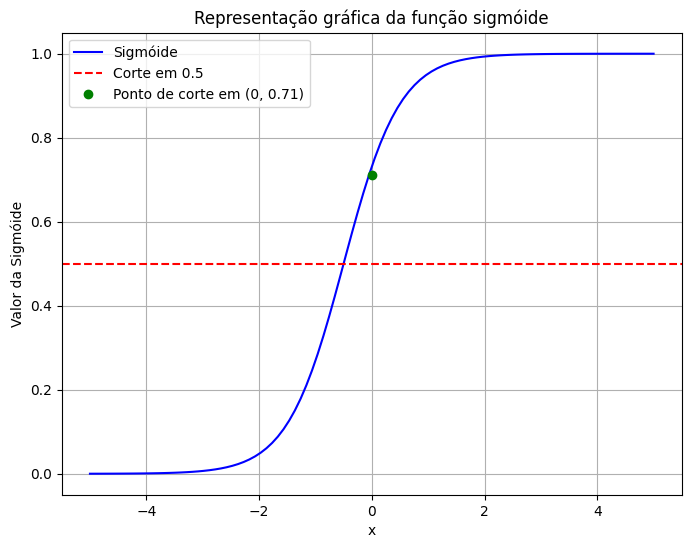

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Parâmetros do classificador
w = np.array([1, 2])  # Vetor de pesos
CLog = 0.5  # Valor de corte

# Calcular a função de decisão (z = w0 + w1*x)
x = np.linspace(-5, 5, 100)
z = w[0] + w[1] * x

# Calcular a função sigmóide para a função de decisão
sigmoid_values = sigmoid(z)

# Calcular o ponto onde a função sigmóide cruza o eixo vertical (x=0)
index_zero = np.argmin(np.abs(x))
y_zero = sigmoid_values[index_zero]

# Plotar a função sigmóide
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid_values, label='Sigmóide', color='blue')
plt.axhline(y=CLog, color='red', linestyle='--', label='Corte em 0.5')
plt.plot(0, y_zero, 'go', label=f'Ponto de corte em (0, {y_zero:.2f})')
plt.xlabel('x')
plt.ylabel('Valor da Sigmóide')
plt.title('Representação gráfica da função sigmóide')
plt.grid(True)
plt.legend()
plt.show()


In [6]:
import numpy as np

# Definindo a função sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Definindo a função de custo
def cost_function(y_hat, y):
    return -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)

# Inicialização dos dados
X = np.array([[1, -1, 1], [1, -1, -1], [1, 0, 0], [1, 1, 1],  [1, -1, 0], [1, 1, -1]])
y = np.array([0, 1, 1, 1, 0, 0])
w = np.array([0.0, 0.0, 0.0])
tmax = 6
alpha = 1
sequence = [3, 2, 5, 1, 1, 6]

# Algoritmo CLog{MGE}
for t in range(tmax):

    x_n = X[sequence[t] - 1]
    y_n = y[sequence[t] - 1]
    p_n_hat = sigmoid(np.dot(w, x_n))
    e_n = p_n_hat - y_n
    gradient = e_n * x_n
    w -= alpha * gradient
    print(w)

# Calculando a acurácia
correct_predictions = 0
for i in range(len(X)):
    prediction = sigmoid(np.dot(w, X[i]))
    print("Preveu ",prediction)
    if prediction >= 0.5:
        if y[i] == 1:
            correct_predictions += 1
    else:
        if y[i] == 0:
            correct_predictions += 1

accuracy = correct_predictions / len(X)
print("Acurácia:", accuracy)


[0.5 0.  0. ]
[ 0.87754067 -0.37754067 -0.37754067]
[ 0.09936244  0.40063756 -0.37754067]
[-0.23716322  0.73716322 -0.71406633]
[-0.39315054  0.89315054 -0.87005365]
[-1.19053936  0.09576172 -0.07266483]
Preveu  0.20440842008808932
Preveu  0.22905829082519472
Preveu  0.23316248511694648
Preveu  0.23731758010517848
Preveu  0.21647954923088195
Preveu  0.26461605457760884
Acurácia: 0.5


In [13]:
import numpy as np

# Definindo a função sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Definindo a função de custo
def cost_function(y_hat, y):
    return -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)

# Inicialização dos dados
X = np.array([[1, -1, 1], [1, -1, -1], [1, 0, 0], [1, 1, 1],  [1, -1, 0], [1, 1, -1]])
y = np.array([1, 0, 0, 1, 0, 0])
w = np.array([0.0, 0.0,0.0])  # Inicialização dos pesos como float
tmax = 3
alpha = 0.1
sequence = [3, 2, 5]

# Algoritmo CLogDKP2{MGE}
for t in range(tmax):
    for n in sequence:
        x_n = X[n - 1]
        y_n = y[n - 1]
        z = np.dot(w, x_n)
        p_n_hat = sigmoid(z)
        e_n = p_n_hat - y_n
        gradient = e_n * x_n + 0.1 * w
        w -= alpha * gradient
        print(w)

# Calculando a acurácia
correct_predictions = 0
for i in range(len(X)):
    prediction = sigmoid(np.dot(w, X[i]))
    if prediction >= 0.5:
        if y[i] == 1:
            correct_predictions += 1
    else:
        if y[i] == 0:
            correct_predictions += 1

accuracy = correct_predictions / len(X)
print("Acurácia:", accuracy)


[-0.05  0.    0.  ]
[-0.09825026  0.04875026  0.04875026]
[-0.14359935  0.09459435  0.04826276]
[-0.18857953  0.0936484   0.04778013]
[-0.2285176   0.13453579  0.0891262 ]
[-0.26725449  0.17421249  0.08823493]
[-0.30794006  0.17247037  0.08735258]
[-0.34103598  0.20692098  0.12265437]
[-0.37425947  0.24148562  0.12142783]
Acurácia: 0.6666666666666666


In [5]:
sigmoid(1.256)

0.7783367615918962

In [12]:
for x in X:
    print((np.dot(x,[1,0,0]))**2)

1
1
1
1
1
1


In [15]:
-0.1*(-0.5)

0.05